In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mreda99","key":"e0c7caacdab81210d9d74992280bf2aa"}'}

In [4]:
from os import mkdir
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json 

In [7]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          18412  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          11079  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5655  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3922  
nickuzmenkov/nih-chest-xrays-tfrecords                      NIH Chest X-rays

In [8]:
! kaggle datasets download -d altruistdelhite04/loan-prediction-problem-dataset

  0% 0.00/12.6k [00:00<?, ?B/s]
100% 12.6k/12.6k [00:00<00:00, 11.0MB/s]


In [9]:
! unzip loan-prediction-problem-dataset.zip

Archive:  loan-prediction-problem-dataset.zip
  inflating: test_Y3wMUE5_7gLdaTN.csv  
  inflating: train_u6lujuX_CVtuZ9i.csv  


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [11]:
df = pd.read_csv("/content/train_u6lujuX_CVtuZ9i.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

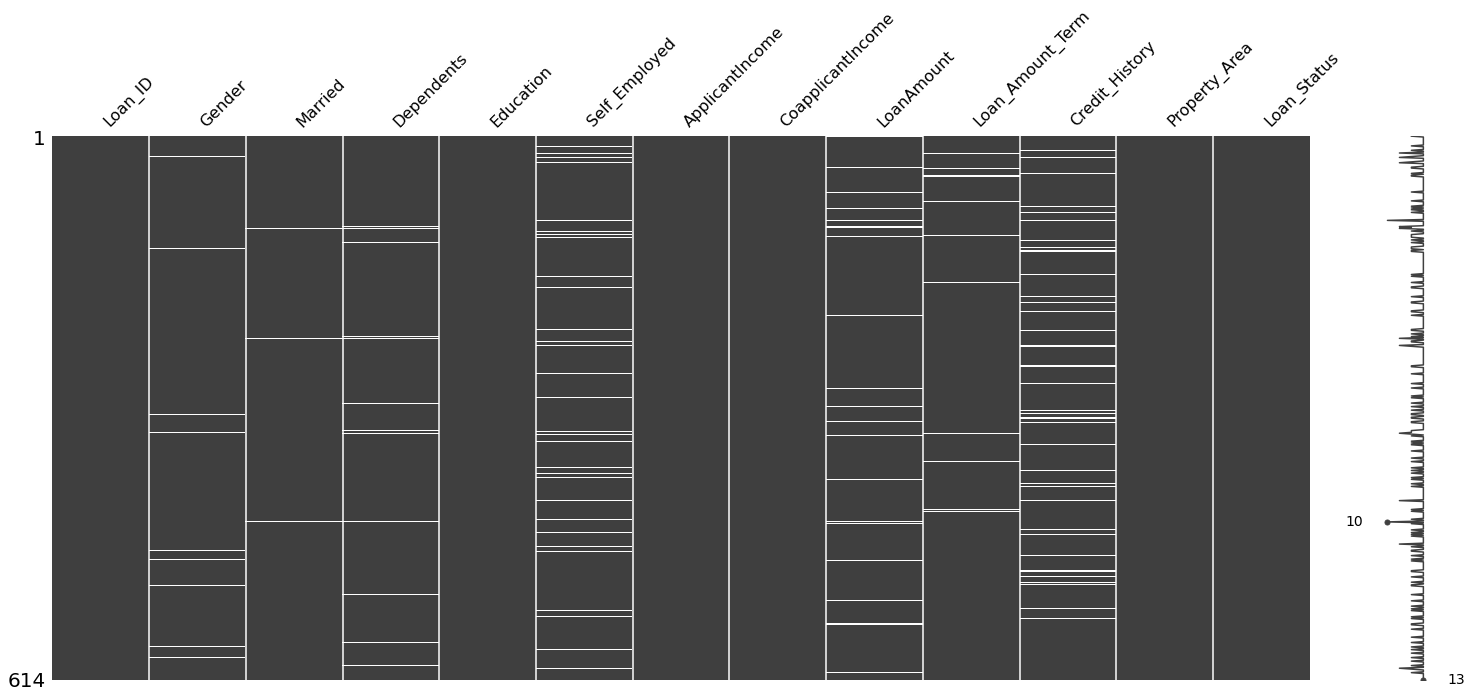

In [15]:
import missingno as msno
msno.matrix(df)
plt.show()

In [16]:
df['Gender'] = df['Gender'].fillna('Male')
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Dependents'] = df['Dependents'].fillna('1')
df['Self_Employed']= df['Self_Employed'].fillna('No')
df['Credit_History'] = df['Credit_History'].fillna(1)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Married'] = df['Married'].fillna('No')

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Y    422
N    192
Name: Loan_Status, dtype: int64

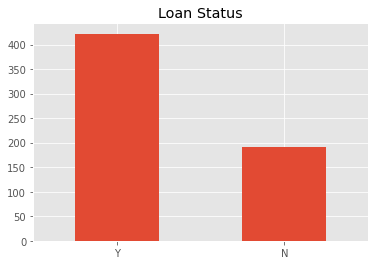

In [18]:
plt.style.use('ggplot')
df['Loan_Status'].value_counts().plot.bar(title='Loan Status',rot=0)
display(df['Loan_Status'].value_counts())

Male      502
Female    112
Name: Gender, dtype: int64

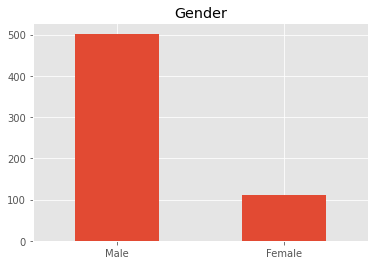

In [19]:
df['Gender'].value_counts().plot.bar(title='Gender',rot=0)
display(df['Gender'].value_counts())

Yes    398
No     216
Name: Married, dtype: int64

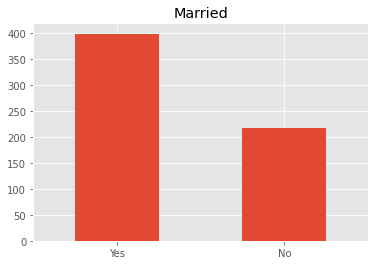

In [20]:
df['Married'].value_counts().plot.bar(title='Married',rot=0)
display(df['Married'].value_counts())


No     532
Yes     82
Name: Self_Employed, dtype: int64

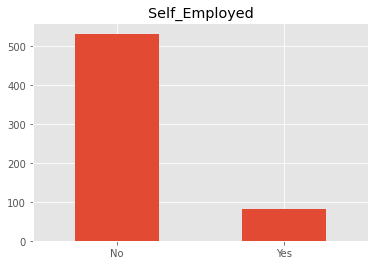

In [21]:
df['Self_Employed'].value_counts().plot.bar(title='Self_Employed',rot=0)
display(df['Self_Employed'].value_counts())

1.0    525
0.0     89
Name: Credit_History, dtype: int64

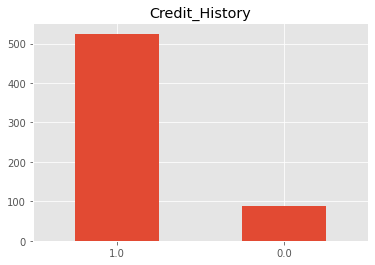

In [22]:
df['Credit_History'].value_counts().plot.bar(title='Credit_History',rot=0)
display(df['Credit_History'].value_counts())


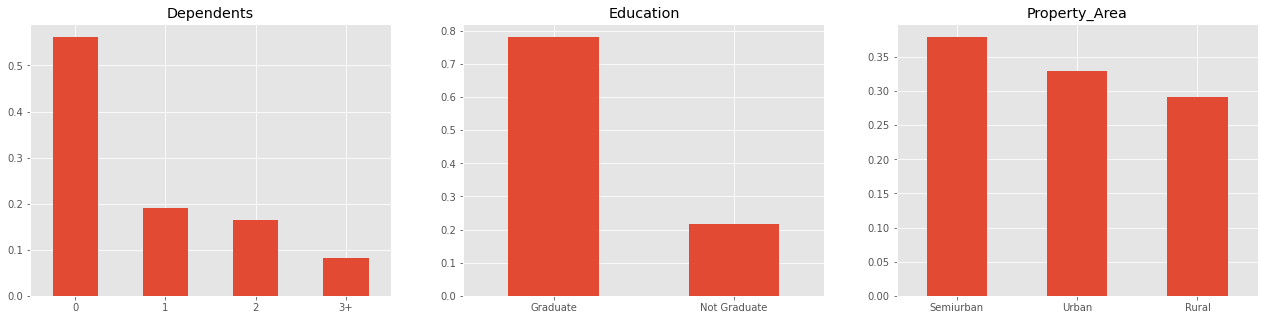

In [23]:
fig2, ax2= plt.subplots(1,3)


df['Dependents'].value_counts(normalize=True).plot(figsize=(22,5),ax=ax2[0],kind='bar',title= 'Dependents',rot=0)

df['Education'].value_counts(normalize=True).plot(ax=ax2[1],kind='bar',title= 'Education',rot=0)

df['Property_Area'].value_counts(normalize=True).plot(ax=ax2[2],kind='bar',title= 'Property_Area',rot=0)


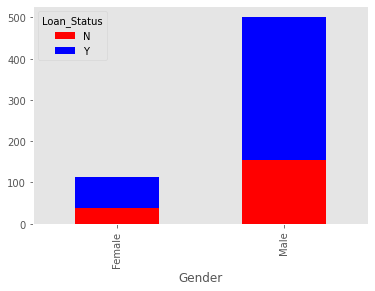

In [24]:
lc = pd.crosstab(df['Gender'], df['Loan_Status'])
lc.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

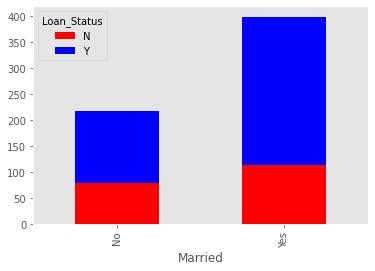

In [25]:
lc = pd.crosstab(df['Married'], df['Loan_Status'])
lc.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

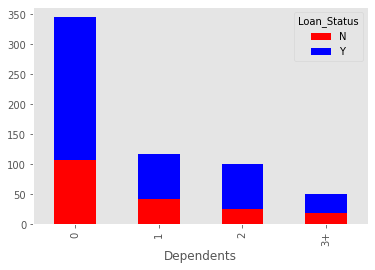

In [26]:
lc = pd.crosstab(df['Dependents'], df['Loan_Status'])
lc.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

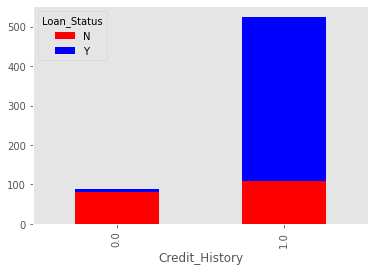

In [27]:
lc = pd.crosstab(df['Credit_History'], df['Loan_Status'])
lc.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

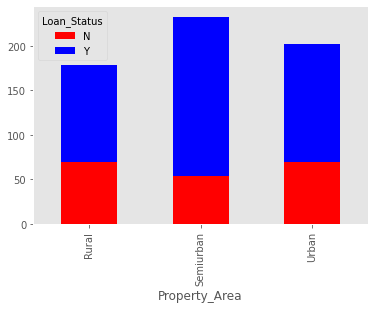

In [28]:
lc = pd.crosstab(df['Property_Area'], df['Loan_Status'])
lc.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

Y    422
N    192
Name: Loan_Status, dtype: int64

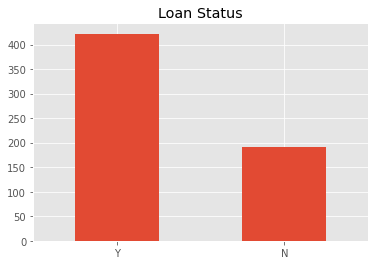

In [29]:
plt.style.use('ggplot')
df['Loan_Status'].value_counts().plot.bar(title='Loan Status',rot=0)
display(df['Loan_Status'].value_counts())

Male      502
Female    112
Name: Gender, dtype: int64

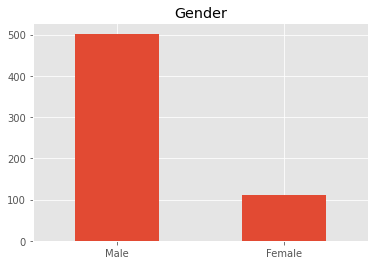

In [30]:
df['Gender'].value_counts().plot.bar(title='Gender',rot=0)
display(df['Gender'].value_counts())

Yes    398
No     216
Name: Married, dtype: int64

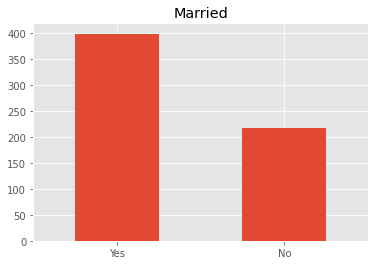

In [31]:
df['Married'].value_counts().plot.bar(title='Married',rot=0)
display(df['Married'].value_counts())


No     532
Yes     82
Name: Self_Employed, dtype: int64

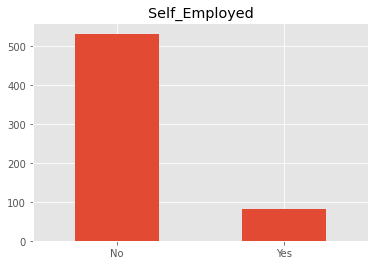

In [32]:
df['Self_Employed'].value_counts().plot.bar(title='Self_Employed',rot=0)
display(df['Self_Employed'].value_counts())

1.0    525
0.0     89
Name: Credit_History, dtype: int64

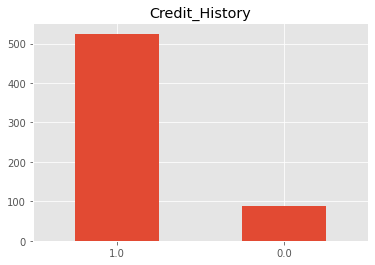

In [33]:
df['Credit_History'].value_counts().plot.bar(title='Credit_History',rot=0)
display(df['Credit_History'].value_counts())


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


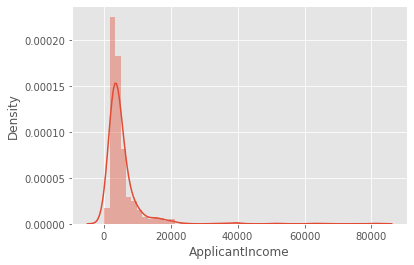

In [34]:
sns.distplot(df['ApplicantIncome'])

In [35]:
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


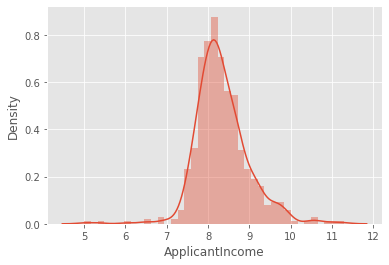

In [36]:
sns.distplot(df['ApplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


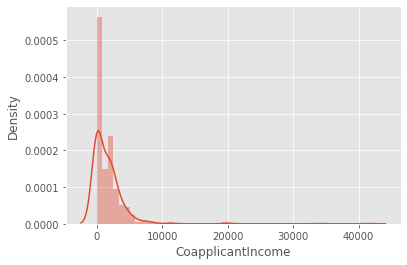

In [37]:
sns.distplot(df['CoapplicantIncome'])

In [38]:
df['CoapplicantIncome'] = np.log(df['CoapplicantIncome']+1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


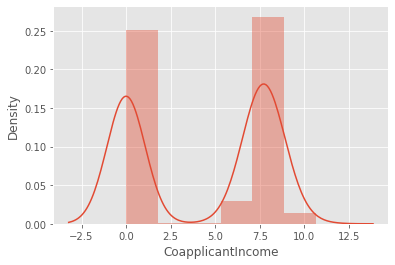

In [39]:
sns.distplot(df['CoapplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


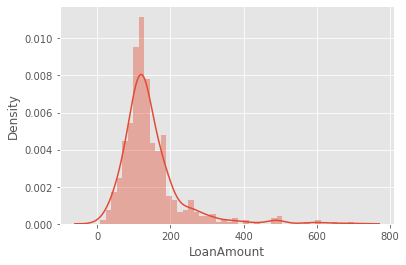

In [40]:
sns.distplot(df['LoanAmount'])


In [41]:
df['LoanAmount'] = np.log(df['LoanAmount'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


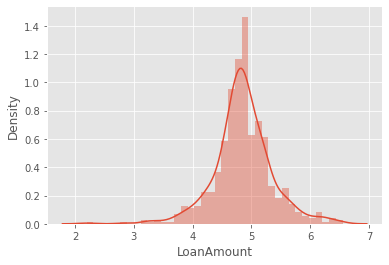

In [42]:
sns.distplot(df['LoanAmount'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


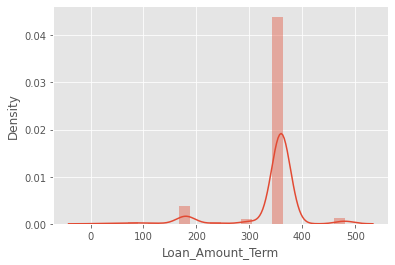

In [43]:
sns.distplot(df['Loan_Amount_Term'])


In [44]:
df['Loan_Amount_Term'] = np.log(df['Loan_Amount_Term'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


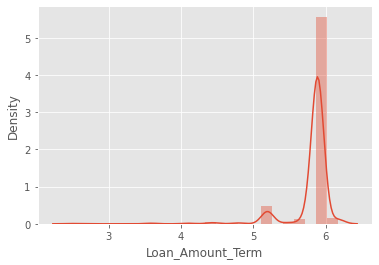

In [45]:
sns.distplot(df['Loan_Amount_Term'])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


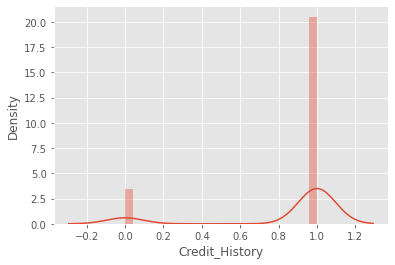

In [46]:
sns.distplot(df['Credit_History'])


In [47]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,8.674026,0.000000,4.852030,5.886104,1.0,Urban,Y,8.674026
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.319202,4.852030,5.886104,1.0,Rural,N,15.749312
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.000000,4.189655,5.886104,1.0,Urban,Y,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765993,4.787492,5.886104,1.0,Urban,Y,15.622700
4,LP001008,Male,No,0,Graduate,No,8.699515,0.000000,4.948760,5.886104,1.0,Urban,Y,8.699515


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


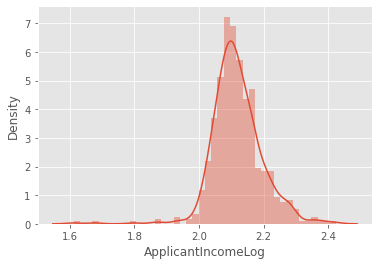

In [48]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncomeLog'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


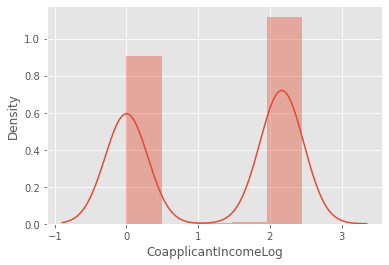

In [49]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome']+1)
sns.distplot(df['CoapplicantIncomeLog'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


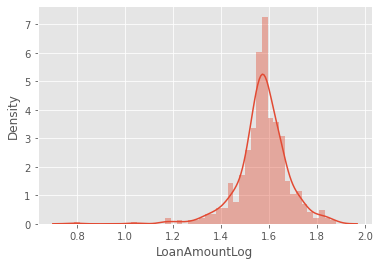

In [50]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmountLog'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


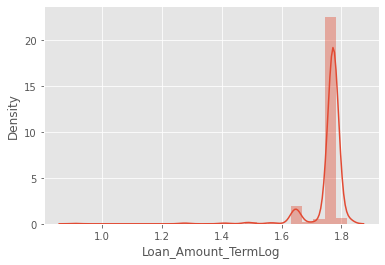

In [51]:
df['Loan_Amount_TermLog'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_TermLog'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


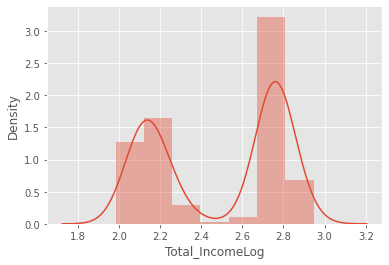

In [52]:
df['Total_IncomeLog'] = np.log(df['Total_Income'])
sns.distplot(df['Total_IncomeLog'])

In [53]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_IncomeLog
0,LP001002,Male,No,0,Graduate,No,8.674026,0.000000,4.852030,5.886104,1.0,Urban,Y,8.674026,2.160333,0.000000,1.579397,1.772594,2.160333
1,LP001003,Male,Yes,1,Graduate,No,8.430109,7.319202,4.852030,5.886104,1.0,Rural,N,15.749312,2.131810,2.118566,1.579397,1.772594,2.756797
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.000000,4.189655,5.886104,1.0,Urban,Y,8.006368,2.080237,0.000000,1.432618,1.772594,2.080237
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,7.765993,4.787492,5.886104,1.0,Urban,Y,15.622700,2.061368,2.170880,1.566007,1.772594,2.748725
4,LP001008,Male,No,0,Graduate,No,8.699515,0.000000,4.948760,5.886104,1.0,Urban,Y,8.699515,2.163267,0.000000,1.599137,1.772594,2.163267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,7.972466,0.000000,4.262680,5.886104,1.0,Rural,Y,7.972466,2.075994,0.000000,1.449898,1.772594,2.075994
610,LP002979,Male,Yes,3+,Graduate,No,8.320205,0.000000,3.688879,5.192957,1.0,Rural,Y,8.320205,2.118687,0.000000,1.305323,1.647303,2.118687
611,LP002983,Male,Yes,1,Graduate,No,8.996157,5.484797,5.533389,5.886104,1.0,Urban,Y,14.480953,2.196797,1.869461,1.710801,1.772594,2.672834
612,LP002984,Male,Yes,2,Graduate,No,8.933664,0.000000,5.231109,5.886104,1.0,Urban,Y,8.933664,2.189827,0.000000,1.654623,1.772594,2.189827


In [54]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' ,'Loan_Amount_Term','Total_Income','Loan_ID','CoapplicantIncomeLog']
df = df.drop(columns = cols , axis = 1)

In [55]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for col in cols :
    df[col] = le.fit_transform(df[col])

In [56]:
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_TermLog,Total_IncomeLog
0,1,0,0,0,0,1.0,2,1,2.160333,1.579397,1.772594,2.160333
1,1,1,1,0,0,1.0,0,0,2.131810,1.579397,1.772594,2.756797
2,1,1,0,0,1,1.0,2,1,2.080237,1.432618,1.772594,2.080237
3,1,1,0,1,0,1.0,2,1,2.061368,1.566007,1.772594,2.748725
4,1,0,0,0,0,1.0,2,1,2.163267,1.599137,1.772594,2.163267
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,1,2.075994,1.449898,1.772594,2.075994
610,1,1,3,0,0,1.0,0,1,2.118687,1.305323,1.647303,2.118687
611,1,1,1,0,0,1.0,2,1,2.196797,1.710801,1.772594,2.672834
612,1,1,2,0,0,1.0,2,1,2.189827,1.654623,1.772594,2.189827


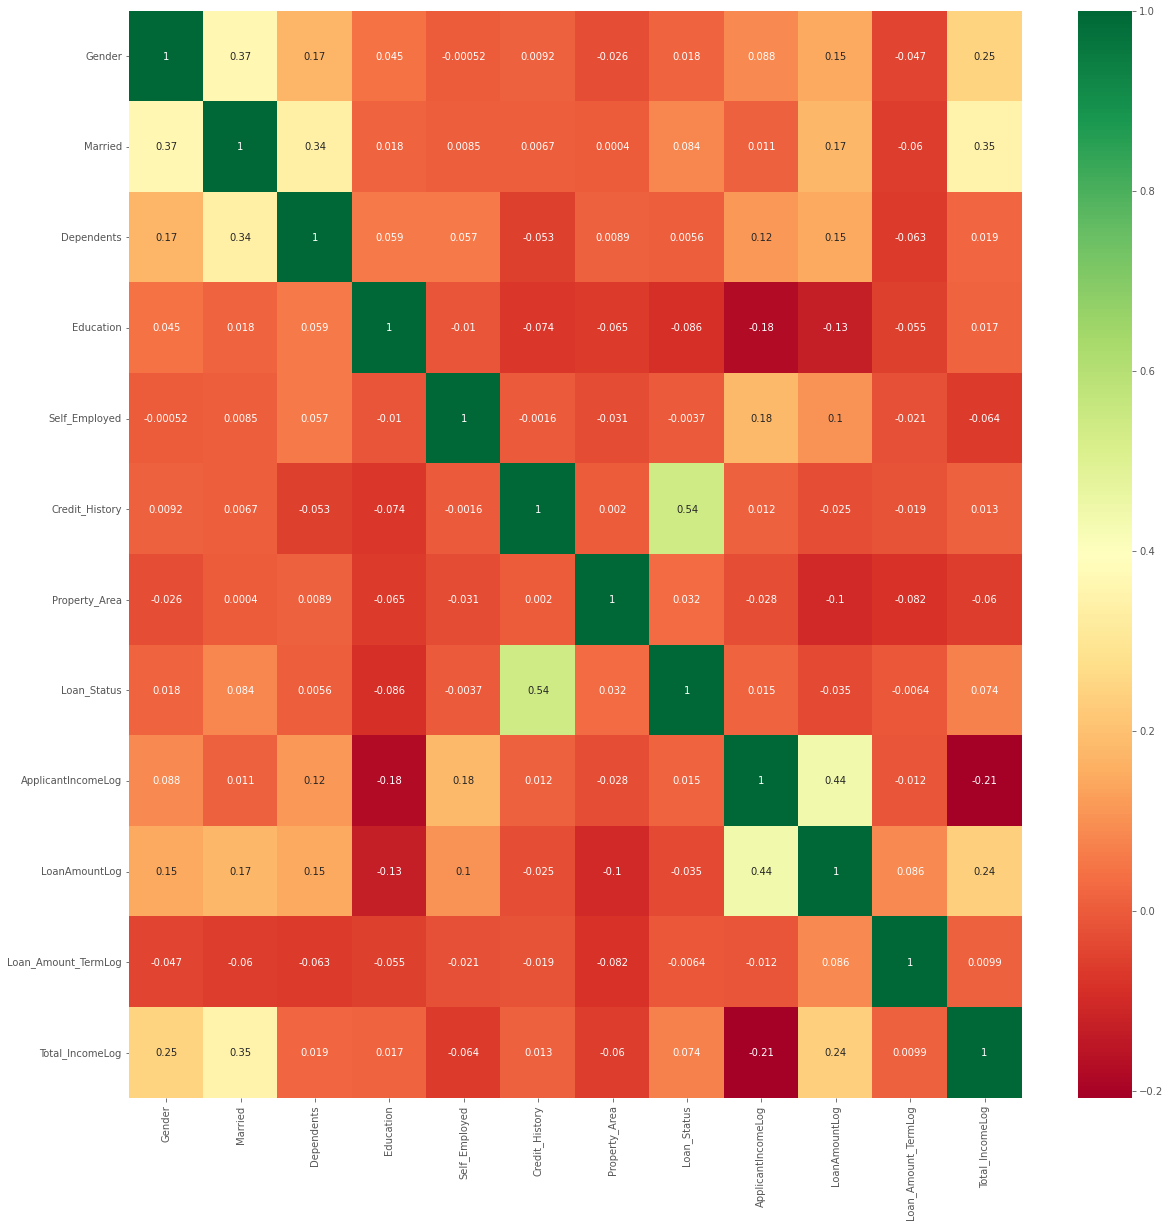

In [57]:
X = df.iloc[:,1:11]  
y = df.iloc[:,11]   
corrmat = df.corr(method='pearson')
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn");

In [58]:
X = df.drop(columns = ['Loan_Status'],axis =1)
y = df['Loan_Status']

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [60]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Accuracy is  77.27272727272727


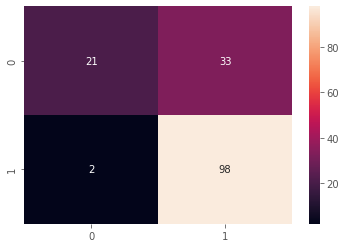

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
print("Accuracy is ", model.score(X_test,y_test)*100)

In [68]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [69]:
model = XGBClassifier(objective = "binary:logistic", missing = None)

In [70]:
model.fit(X_train, y_train, verbose = True,
         early_stopping_rounds = 10,
         eval_metric = "aucpr",
         eval_set = [(X_test, y_test)])

[0]	validation_0-aucpr:0.734458
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.73488
[2]	validation_0-aucpr:0.735322
[3]	validation_0-aucpr:0.752935
[4]	validation_0-aucpr:0.752852
[5]	validation_0-aucpr:0.752905
[6]	validation_0-aucpr:0.753024
[7]	validation_0-aucpr:0.758388
[8]	validation_0-aucpr:0.752537
[9]	validation_0-aucpr:0.752976
[10]	validation_0-aucpr:0.753126
[11]	validation_0-aucpr:0.781479
[12]	validation_0-aucpr:0.778625
[13]	validation_0-aucpr:0.79271
[14]	validation_0-aucpr:0.792758
[15]	validation_0-aucpr:0.792379
[16]	validation_0-aucpr:0.791067
[17]	validation_0-aucpr:0.791929
[18]	validation_0-aucpr:0.789346
[19]	validation_0-aucpr:0.793915
[20]	validation_0-aucpr:0.789347
[21]	validation_0-aucpr:0.804737
[22]	validation_0-aucpr:0.802381
[23]	validation_0-aucpr:0.79986
[24]	validation_0-aucpr:0.803588
[25]	validation_0-aucpr:0.804009
[26]	validation_0-aucpr:0.803697
[27]	validation_0-aucpr:0.81151
[28]	validation_0-aucpr:

XGBClassifier()

In [72]:
predictions = model.predict(X_test)
accuracy_score(predictions, y_test)

0.7662337662337663

In [73]:
from sklearn.tree import DecisionTreeClassifier


In [74]:
model2 = DecisionTreeClassifier() # testing for DecisionTreeClassifier
model2.fit(X_train, y_train)
predictions2 = model2.predict(X_test)
accuracy_score(predictions2, y_test)

0.6688311688311688

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
model3 = RandomForestClassifier() # testing for RandomForestClassifier
model3.fit(X_train, y_train)
predictions3 = model3.predict(X_test)
accuracy_score(predictions3, y_test)

0.7662337662337663

In [78]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train) 
predictions4 = classifier.predict(X_test)
accuracy_score(predictions3, y_test)

0.7662337662337663